<a href="https://colab.research.google.com/github/mahmouddraz/xai/blob/main/notebooks/tsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mahmouddraz/xai/blob/main/notebooks/tsa.ipynb)

#About the use case

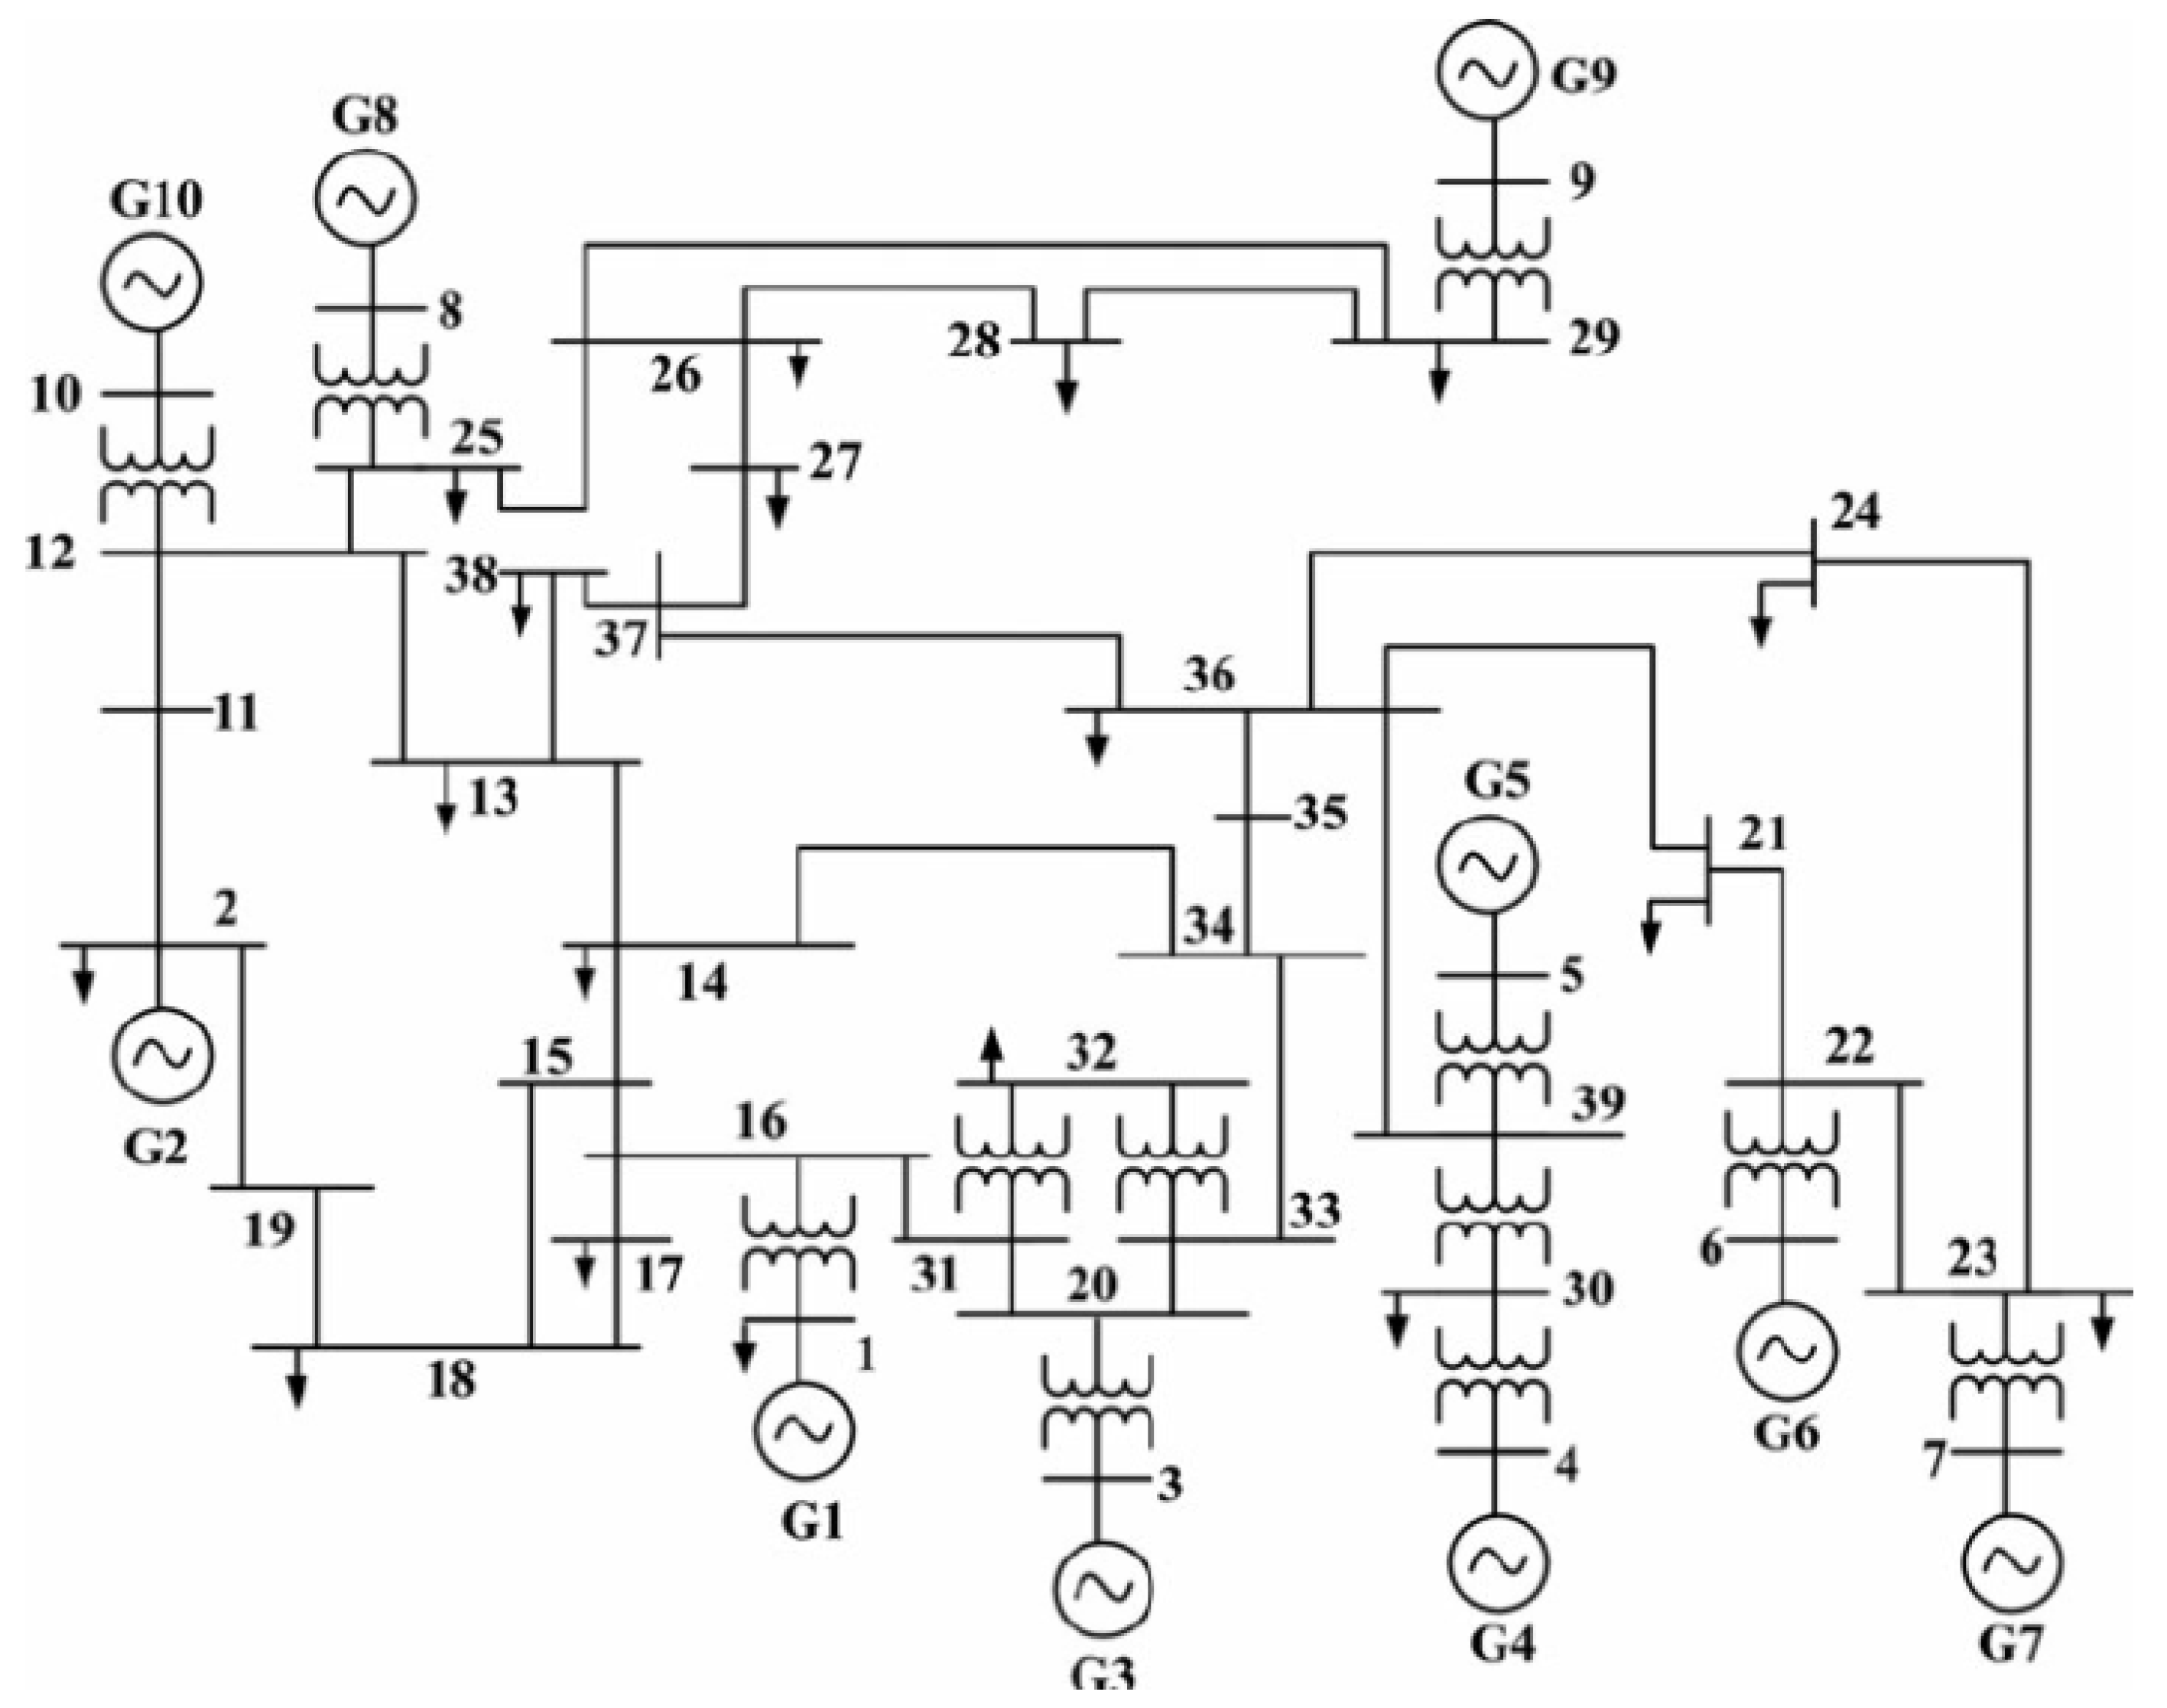

In [108]:
import pandas as pd
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [109]:
grid_models =  ["NineBusSystem",
                'NewEngland'
                ]

# Load dataset and pretrained model

In [110]:
new_england_dataset_url = "https://drive.google.com/file/d/1eXtw44VXhYM0jQyJGGY5Eevdrg8yui0w/view?usp=sharing"

data_file_id = new_england_dataset_url.split('/')[-2]

data_read_url='https://drive.google.com/uc?id=' + data_file_id

In [111]:
data = pd.read_pickle(data_read_url)

In [112]:
data = data[7]

In [113]:
X = data.drop('stable-unstable', axis=1)
y = data['stable-unstable']

# Train a RF classifier

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [116]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#Model testing

In [117]:
y_pred = clf.predict(X_test)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


# Shap

In [51]:
! pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.2 MB/s eta 0:00:00


In [119]:
import shap
import matplotlib.pyplot as plt

In [120]:
explainer = shap.Explainer(clf, X_train)

In [121]:
shap_values = explainer.shap_values(X_train.iloc[:100])

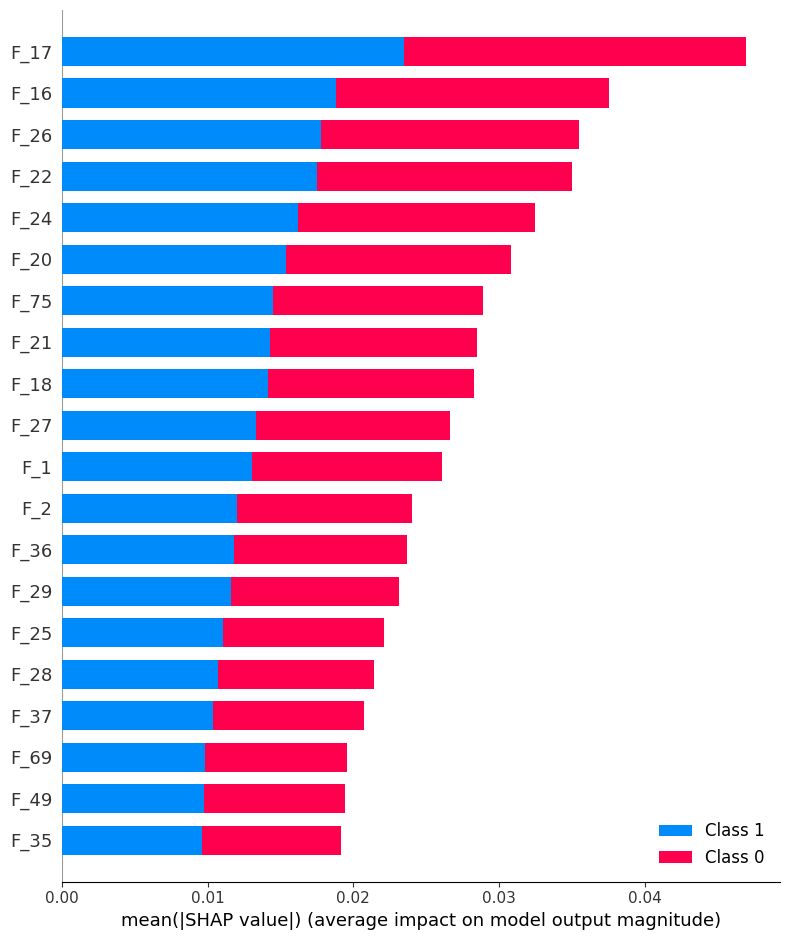

In [122]:
shap.summary_plot(shap_values, X_test.iloc[:10], feature_names=X.columns)

In [125]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[0][0, :], X_test.iloc[0, :])


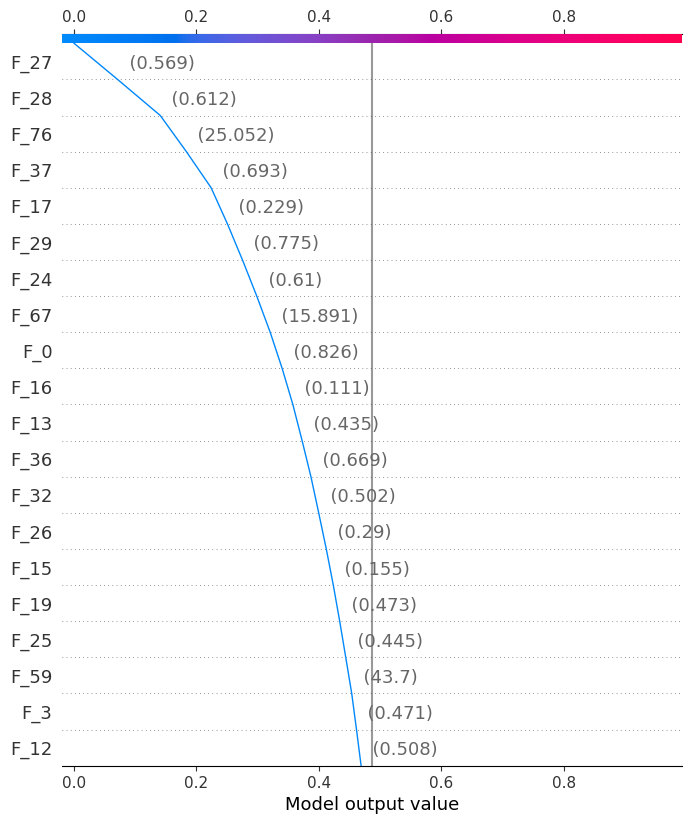

In [151]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test)

#LIME


In [152]:
!pip install lime

In [153]:
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer

In [154]:
explainer = LimeTabularExplainer(X_train.values, mode="classification", feature_names=feature_names)

In [155]:
feature_names = X_train.columns.tolist()

In [158]:
explanation = explainer.explain_instance(X_test.iloc[10, :], clf.predict_proba)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [159]:
explanation.show_in_notebook()